Chapter 1 - Multinomial BNs - Learning BNs from Data

Train Survey

Age - young, adult, old Sex - male, female Education - high (high-school), university degree Occupation - emp (employee), self-employed (self) Residence - city size: small, big Transportation - car, train, other

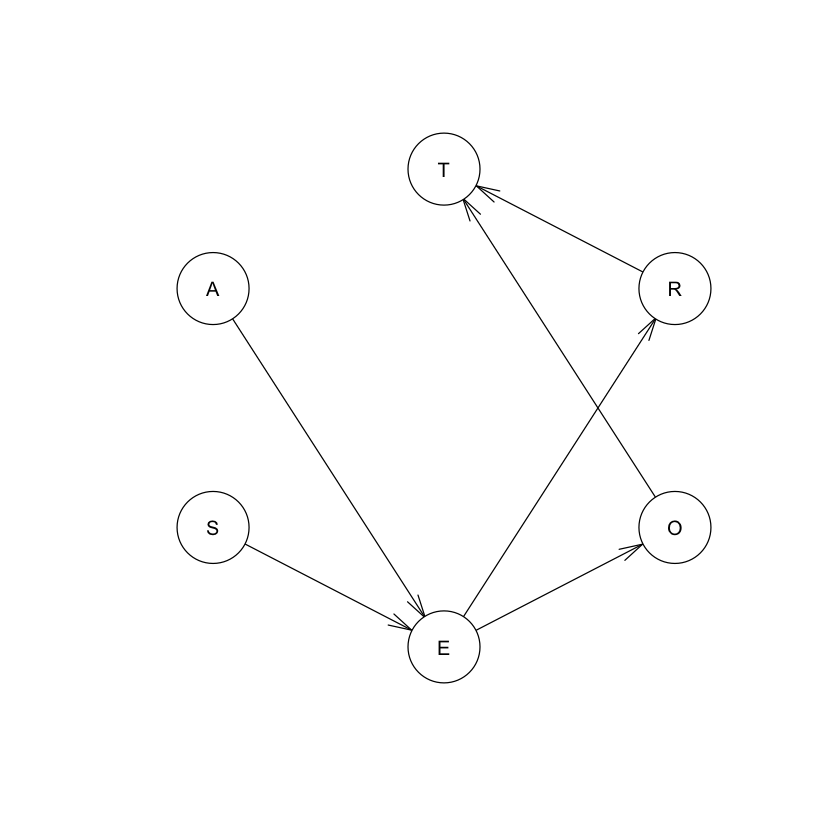

In [1]:
# clear the memory
rm(list = ls())
library(bnlearn)

# set the directory
setwd("~/Dropbox/IAD/BN_COURSE/Lab3")

# create an empty graph
dag <- empty.graph(nodes = c("A", "S", "E", "O", "R", "T"))

# Add in the edges
dag <- set.arc(dag, from = "A", to = "E") # age influences education
dag <- set.arc(dag, from = "S", to = "E") # sex influences education
dag <- set.arc(dag, from = "E", to = "O") # .... 
dag <- set.arc(dag, from = "E", to = "R") # ....
dag <- set.arc(dag, from = "O", to = "T") # ....
dag <- set.arc(dag, from = "R", to = "T") # ....

plot(dag)

# Read in the data
survey <- read.table("survey.txt", header = TRUE, colClasses = "factor")


In [2]:
# Tests for conditional independence
# ?ci.test
# H0 T and E are conditionally independent given ("O", "R") --> NO edge
# HA T and E are no independent given ("O", "R") --> edge

# Test 1 -- see if an edge should be there (E->T)
# Mutual Independence - test 
ci.test("T", "E", c("O", "R"), test = "mi", data = survey)

# Chi-Squared - test 
ci.test("T", "E", c("O", "R"), test = "x2", data = survey)

# overall, there is no evidence for an edge


	Mutual Information (disc.)

data:  T ~ E | O + R
mi = 9.8836, df = 8, p-value = 0.2733
alternative hypothesis: true value is greater than 0



	Pearson's X^2

data:  T ~ E | O + R
x2 = 8.2375, df = 8, p-value = 0.4106
alternative hypothesis: true value is greater than 0


In [3]:
# Conditional Independence Tests -- arc should stay
# (O -> T) not much evidence for an edge
ci.test("T", "O", "R", test = "x2", data = survey) 


	Pearson's X^2

data:  T ~ O | R
x2 = 3.7988, df = 4, p-value = 0.4339
alternative hypothesis: true value is greater than 0


In [4]:
# Use a DAG to determine arc strength over all edges
arc.strength(dag, data = survey, criterion = "x2")

,from,to,strength
,<chr>,<chr>,<dbl>
1,A,E,0.0009777168
2,S,E,0.0012537013
3,E,O,0.0026379469
4,E,R,0.0005599201
5,O,T,0.4339127237
6,R,T,0.0013584250


In [5]:
# Learn the Full Network from Data

# examine scores
set.seed(123) # reproducing our output
score(dag, data = survey, type = "bic") # BIC
score(dag, data = survey, type = "bde", iss = 10) # BDE
score(dag, data = survey, type = "bde", iss = 1) # BDE

# make a change in the network and re-examine the scores
dag4 <- set.arc(dag, from = "E", to = "T")
score(dag4, data = survey, type = "bic") # no improvement - as expected

# examine the score of a random graph - just for comparison 
# (no informatoin in the graph)
rnd <- random.graph(nodes = c("A", "S", "E", "O", "R", "T"))
modelstring(dag)
modelstring(rnd)
score(rnd, data = survey, type = "bic")

# With the hill-climbing algorithm
learned <- hc(survey)
learned

[1] -2012.687

[1] -1998.284

[1] -2015.647

[1] -2032.603

[1] "[A][S][E|A:S][O|E][R|E][T|O:R]"

[1] "[A][O][R][S|A][T|R][E|S]"

[1] -2010.378


  Bayesian network learned via Score-based methods

  model:
   [R][E|R][T|R][A|E][O|E][S|E] 
  nodes:                                 6 
  arcs:                                  5 
    undirected arcs:                     0 
    directed arcs:                       5 
  average markov blanket size:           1.67 
  average neighbourhood size:            1.67 
  average branching factor:              0.83 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              3.107304 
  tests used in the learning procedure:  40 
  optimized:                             TRUE 


In [6]:
# Examine closer - the network
modelstring(learned)
modelstring(dag)

[1] "[R][E|R][T|R][A|E][O|E][S|E]"

[1] "[A][S][E|A:S][O|E][R|E][T|O:R]"

In [7]:
# plot(learned)
# plot(dag)

score(learned, data = survey, type = "bic")
score(dag, data = survey, type = "bic")

[1] -1998.432

[1] -2012.687

In [8]:
# deeper look at the networks and strengths 
arc.strength(learned, data = survey, criterion = "bic")
arc.strength(dag, data = survey, criterion = "bic")


,from,to,strength
,<chr>,<chr>,<dbl>
1,R,E,-3.3896261
2,E,S,-2.7260640
3,R,T,-1.8484171
4,E,A,-1.7195441
5,E,O,-0.8266937


,from,to,strength
,<chr>,<chr>,<dbl>
1,A,E,2.4889383
2,S,E,1.4824183
3,E,O,-0.8266937
4,E,R,-3.3896261
5,O,T,10.0457874
6,R,T,2.9734338
